<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66 entries, 2018-01-21 to 2019-04-21
Data columns (total 7 columns):
total_entrez_gene           66 non-null int64
total_ensembl_gene          66 non-null int64
total_ensembl_other_gene    66 non-null int64
total_merged_gene           66 non-null int64
version_entrez              66 non-null int64
version_ensembl             66 non-null int64
version_ensembl_other       66 non-null object
dtypes: int64(6), object(1)
memory usage: 4.1+ KB


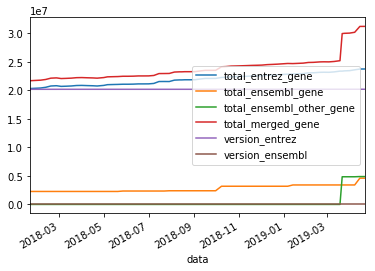

In [5]:
%matplotlib inline
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.stattools import adfuller


df = pd.read_csv("totals.csv",
                 index_col=0,
                 parse_dates=[0],)
                 #date_parser=lambda d: datetime.strptime(d,"%d/%m/%Y"))
df.version_ensembl_other.replace('None', 0, inplace=True)
df.info()
df.head()
df.plot()

In [66]:
model = Prophet(interval_width=0.95)
df["ds"] = df.index
df["y"] = df.total_merged_gene[:-4]
df.info()
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66 entries, 2018-01-21 to 2019-04-21
Data columns (total 10 columns):
total_entrez_gene           66 non-null int64
total_ensembl_gene          66 non-null int64
total_ensembl_other_gene    66 non-null int64
total_merged_gene           66 non-null int64
version_entrez              66 non-null int64
version_ensembl             66 non-null int64
version_ensembl_other       66 non-null object
y                           62 non-null float64
ds                          66 non-null datetime64[ns]
cap                         66 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 5.7+ KB


In [67]:
future_dates = model.make_future_dataframe(periods=60)
future_dates.tail()

,ds
121,2019-06-16
122,2019-06-17
123,2019-06-18
124,2019-06-19
125,2019-06-20


In [68]:
forecast = model.predict(future_dates)

In [69]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-21,2.171177e+07,2.053130e+07,2.280256e+07
1,2018-02-04,2.180357e+07,2.067466e+07,2.293035e+07
2,2018-02-11,2.184947e+07,2.078398e+07,2.289793e+07
3,2018-02-18,2.189537e+07,2.075952e+07,2.296331e+07
4,2018-02-25,2.194127e+07,2.096364e+07,2.303461e+07
5,2018-02-26,2.190889e+07,2.073646e+07,2.300412e+07
6,2018-03-04,2.198717e+07,2.085915e+07,2.308520e+07
7,2018-03-11,2.203307e+07,2.091853e+07,2.317019e+07
8,2018-03-18,2.207897e+07,2.098685e+07,2.313936e+07
9,2018-03-25,2.212487e+07,2.094227e+07,2.315813e+07


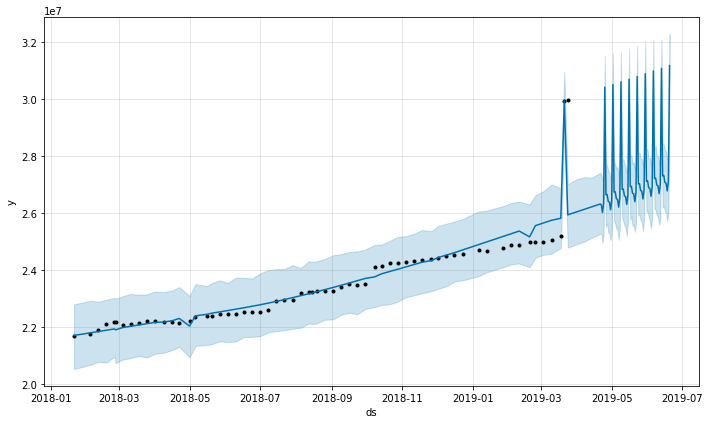

In [70]:
_ = model.plot(forecast,uncertainty=True)

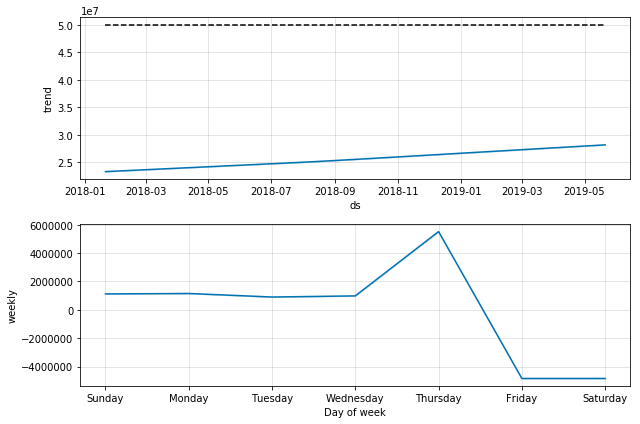

In [57]:
_ = model.plot_components(forecast)